In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate
import grb_catalogs
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.table import Table
import healpy as hp
from pylab import cm
import matplotlib.colors as mpl_col

In [2]:
biadir='/Users/jracusin/Bia/'

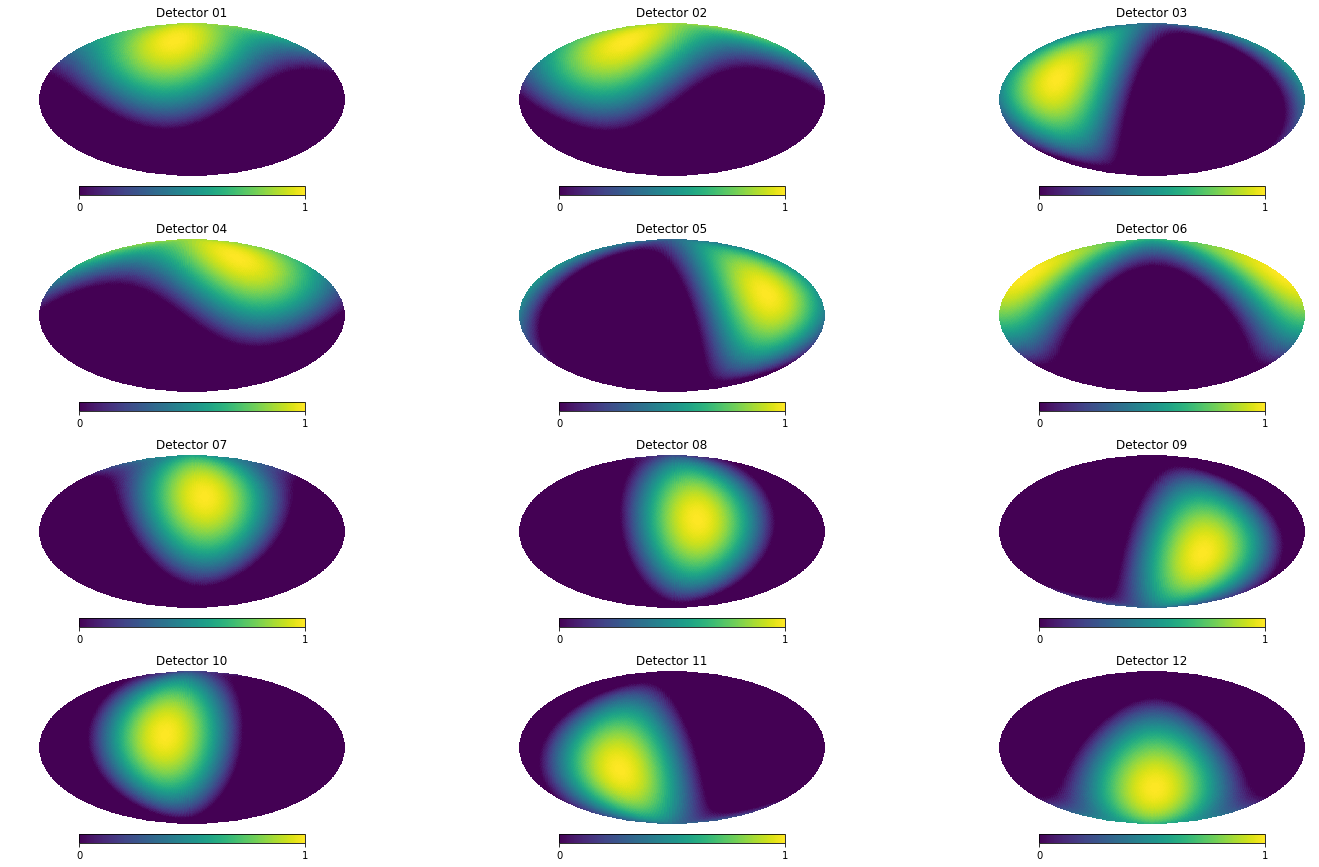

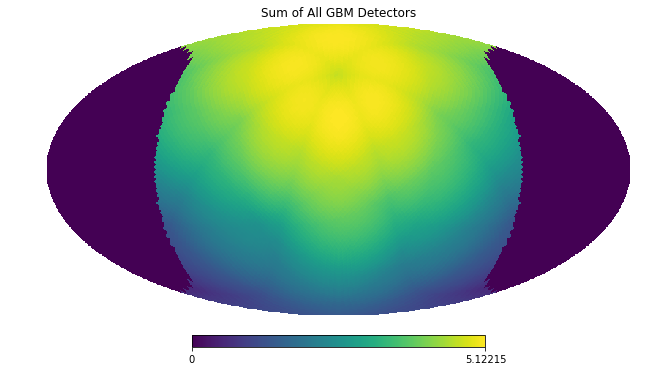

In [3]:
## setup GBM
gbm_pointings = {'01': ('45:54:0','20:36:0'),
            '02': ('45:6:0','45:18:0'),
            '03': ('58:24:0','90:12:0'),
            '04': ('314:54:0','45:12:0'),
            '05': ('303:12:0','90:18:0'),
            '06': ('3:24:0','89:48:0'),
            '07': ('224:54:0','20:24:0'),
            '08': ('224:36:0','46:12:0'),
            '09': ('236:36:0','90:0:0'),
            '10': ('135:12:0','45:36:0'),
            '11': ('123:42:0','90:24:0'),
            '12': ('183:42:0','90:18:0')}

npointings=len(gbm_pointings)
fermi = Spacecraft(gbm_pointings,lat='50:00:00',lon='260:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
gbm_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1.0) for position in exposure_positions.T] 
                      for detector in fermi.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(gbm_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(gbm_exposures[i]/max(gbm_exposures[i]),title='Detector '+gbm_pointings.keys()[i],\
                sub = [int(npointings/3.),3,int(str(j+1))])
gbm_exps=gbm_exposures.sum(axis=0)
gbm_fs=gbm_exps#-min(gbm_exps))/max(gbm_exps)
vec=hp.ang2vec(180,0,lonlat=True)
i=hp.query_disc(NSIDE,vec,67*np.pi/180.)
gbm_fs[i]=0
hp.mollview(gbm_fs,title='Sum of All GBM Detectors')#,max=2.5)

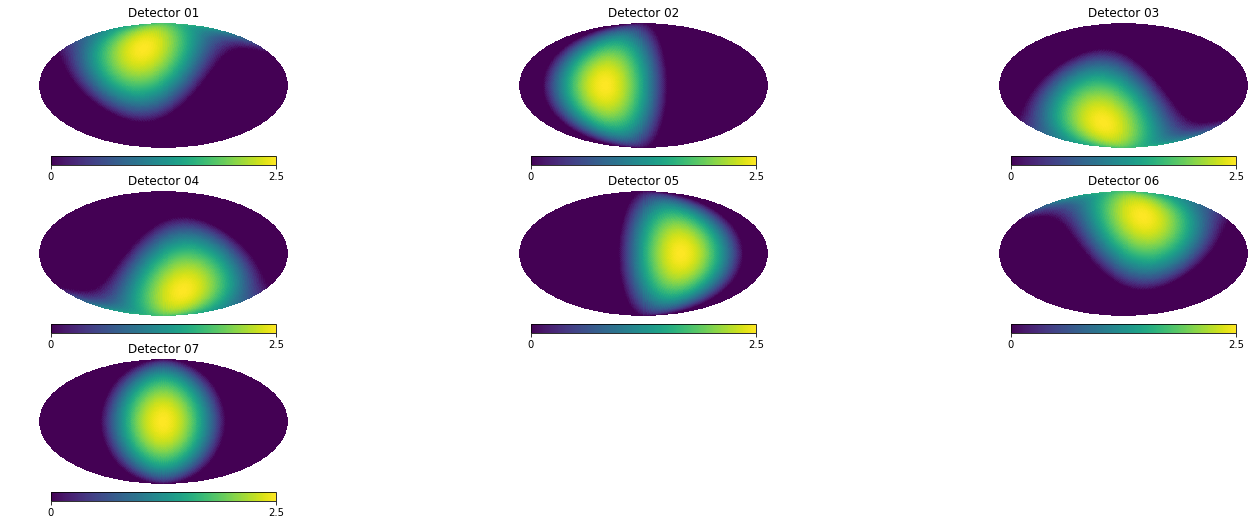

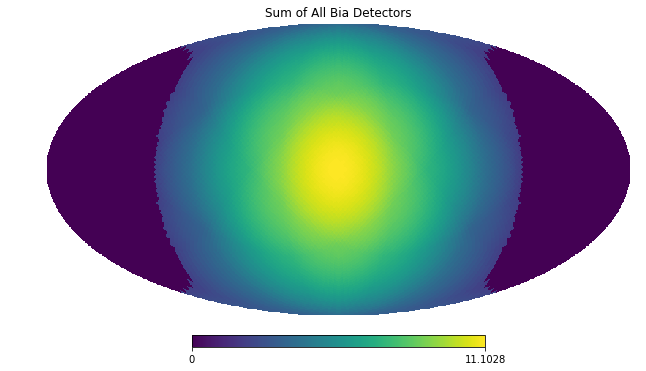

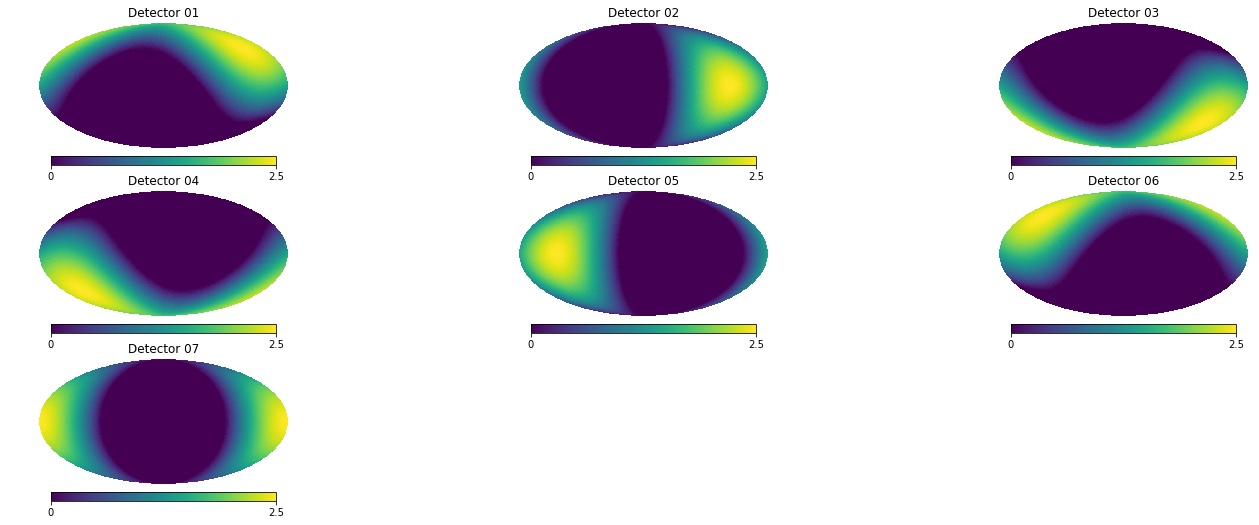

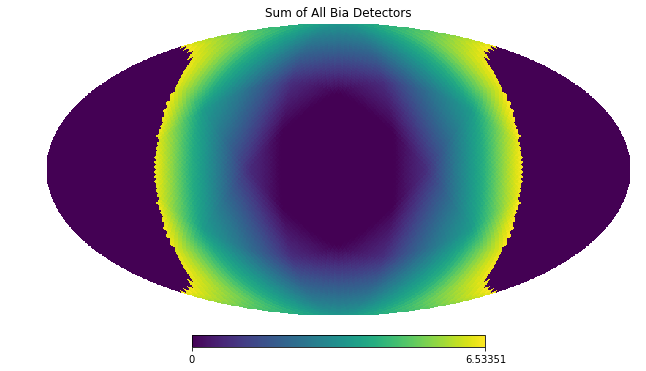

In [12]:
## setup Bia

ang=55
# bia_pointings = {'01': ('30:0:0','60:0:0'),
#                '02': ('90:0:0','60:0:0'),
#                 '03': ('150:0:0','60:0:0'),
#                '04': ('210:0:0','60:0:0'),
#                '05': ('270:0:0','60:0:0'),
#                '06': ('330:0:0','60:0:0'),
#                '07': ('0:0:0','0:0:0')}
bia_pointings = {'01': ('30:0:0',str(ang)+':0:0'),
               '02': ('90:0:0',str(ang)+':0:0'),
                '03': ('150:0:0',str(ang)+':0:0'),
               '04': ('210:0:0',str(ang)+':0:0'),
               '05': ('270:0:0',str(ang)+':0:0'),
               '06': ('330:0:0',str(ang)+':0:0'),
               '07': ('0:0:0','0:0:0')}
# bia_pointings = {'01': ('30:0:0','40:0:0'),
#                '02': ('90:0:0','70:0:0'),
#                 '03': ('150:0:0','40:0:0'),
#                '04': ('210:0:0','70:0:0'),
#                '05': ('270:0:0','40:0:0'),
#                '06': ('330:0:0','70:0:0'),
#                '07': ('0:0:0','0:0:0')}
Aeff_fact=2.5

## TAP
# bia_pointings = {'01': ('45:0:0','45:0:0'),
#                 '02': ('135:0:0','45:0:0'),
#                 '03': ('225:0:0','45:0:0'),
#                 '04': ('315:0:0','45:0:0'),
#                 '05': ('45:0:0','225:0:0'),
#                 '06': ('135:0:0','225:0:0'),
#                 '07': ('225:0:0','225:0:0'),
#                 '08': ('315:0:0','225:0:0')}

# # Nimble-HAM
# bia_pointings = {'01': ('0:0:0','70:0:0'),
#                '02': ('60:0:0','70:0:0'),
#                 '03': ('120:0:0','70:0:0'),
#                '04': ('180:0:0','70:0:0'),
#                '05': ('240:0:0','70:0:0'),
#                '06': ('300:0:0','70:0:0'),
#                '07': ('0:0:0','0:0:0')}

npointings=len(bia_pointings)
bia = Spacecraft(bia_pointings,lat='00:00:00',lon='260:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
bia_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1) for position in exposure_positions.T] 
                      for detector in bia.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(bia_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(bia_exposures[i]/max(bia_exposures[i])*Aeff_fact,title='Detector '+bia_pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=bia_exposures.sum(axis=0)*Aeff_fact
#bia_fs=(exps-min(exps))/max(exps)
bia_fs=exps#-min(gbm_exps))/max(gbm_exps)
vec=hp.ang2vec(180,0,lonlat=True)
i=hp.query_disc(NSIDE,vec,67*np.pi/180.)
bia_fs[i]=0
hp.mollview(bia_fs,title='Sum of All Bia Detectors')#,max=2.5)
plot.savefig(biadir+'exposure_maps_'+str(ang)+'.png')

##### bia 2
bia2 = Spacecraft(bia_pointings,lat='00:00:00',lon='80:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
bia_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1) for position in exposure_positions.T] 
                      for detector in bia2.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(bia_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(bia_exposures[i]/max(bia_exposures[i])*Aeff_fact,title='Detector '+bia_pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=bia_exposures.sum(axis=0)*Aeff_fact
#bia_fs=(exps-min(exps))/max(exps)
bia_fs2=exps#-min(gbm_exps))/max(gbm_exps)
vec=hp.ang2vec(180,0,lonlat=True)
i=hp.query_disc(NSIDE,vec,67*np.pi/180.)
bia_fs2[i]=0
hp.mollview(bia_fs2,title='Sum of All Bia Detectors')#,max=2.5)

In [13]:
def plot_skewed_map(expratio,title=''):
    vmin_skewed = min(expratio)
    vmid_skewed =  1.0
    vmax_skewed = max(expratio)
    vstep = 0.05
    levels = np.arange(vmin_skewed, vmax_skewed+vstep, vstep)
    cmap = cm.get_cmap('bwr', len(levels)-1)
    deltamax = max(vmax_skewed-vmid_skewed, vmid_skewed-vmin_skewed)

    vfull = [ vmid_skewed-deltamax, vmid_skewed+deltamax]  # Full range either side of vmid
    #levfull = np.arange( vfull[0], vfull[1], vstep ) # Levels over full value range

    ncols = len(levels) -1 # number of colours we actually want to use

    vlo_frac = (vmin_skewed-vfull[0]) / (2.0*deltamax) # 0 or greater
    vhi_frac = (vmax_skewed-vfull[0]) / (2.0*deltamax) # 1 or less
    cmap_base = cm.get_cmap('bwr') # maps the range 0-1 to colours
    cols = cmap_base( np.linspace( vlo_frac, vhi_frac, ncols) )
    cmap_skewed = mpl_col.LinearSegmentedColormap.from_list('skewed',cols, N=ncols)
    cmap_skewed.set_bad('gray')
    cmap_skewed.set_under('w')

    #expratio=expratio/max(expratio)
    hp.mollview(expratio,title=title,cmap=cmap_skewed)

/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


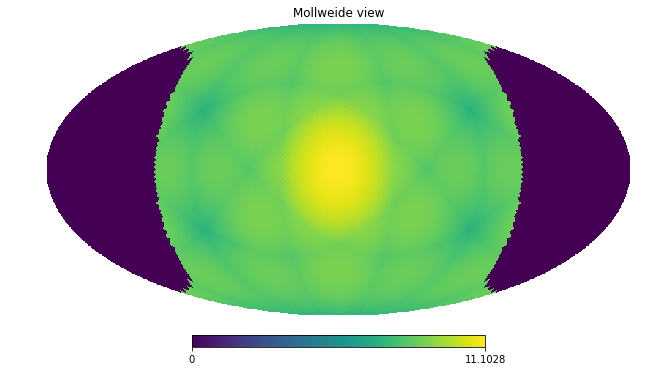

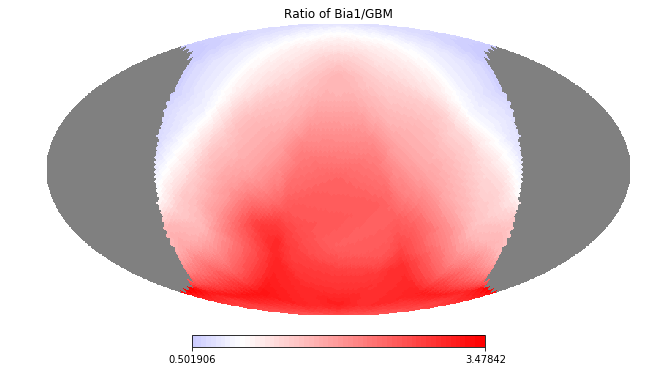

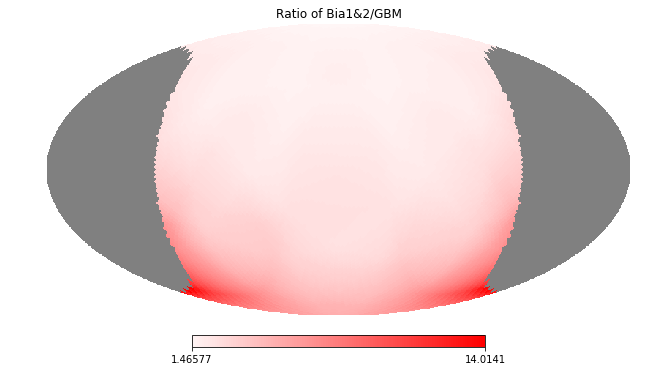

In [14]:
hp.mollview(bia_fs+bia_fs2)
### plot ratio with Bia scaled by x2.5
expratio2=(bia_fs+bia_fs2)/gbm_fs
expratio=(bia_fs)/gbm_fs

plot_skewed_map(expratio,title='Ratio of Bia1/GBM')
plot_skewed_map(expratio2,title='Ratio of Bia1&2/GBM')
#hp.write_map(expratio,'Bia_GBM_ratio_healpy.fits',over_write=True)

1.0


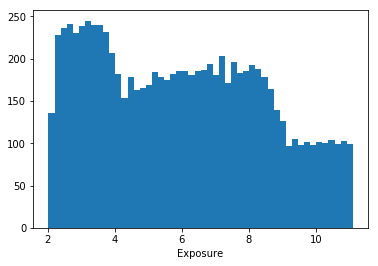

/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


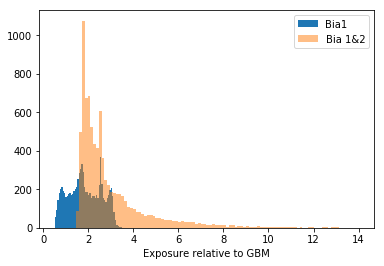

0.15206185567
0.0


/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


In [15]:
plot.figure()
plot.hist(bia_fs[bia_fs>0],bins=50)
plot.xlabel('Exposure')
print len(np.where(bia_fs>=2.)[0])*1./len(np.where(bia_fs>0)[0])
plot.show()

## fraction of visible sky in which GBM is more sensitive than Bia
plot.figure()
h=plot.hist(expratio[expratio>min(expratio)],bins=50,label='Bia1')
h2=plot.hist(expratio2[expratio2>min(expratio2)],bins=100,alpha=0.5,label='Bia 1&2')
plot.xlabel('Exposure relative to GBM')
plot.legend()
plot.show()
w=np.where((expratio>0)&(expratio<=1))[0]
wdet=np.where(expratio>0)[0]
print float(len(w))/len(expratio[wdet])
w=np.where((expratio2>0)&(expratio2<=1))[0]
wdet=np.where(expratio2>0)[0]
print float(len(w))/len(expratio2[wdet])

In [16]:
### median exposure weighted effective area ratio
print np.median(expratio[expratio>0]),np.std(expratio[expratio>0])
print np.median(expratio2[expratio2>0]),np.std(expratio2[expratio2>0])

1.7991641044594842 0.7245892829708209
2.433234000333913 1.6368936975325863


/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


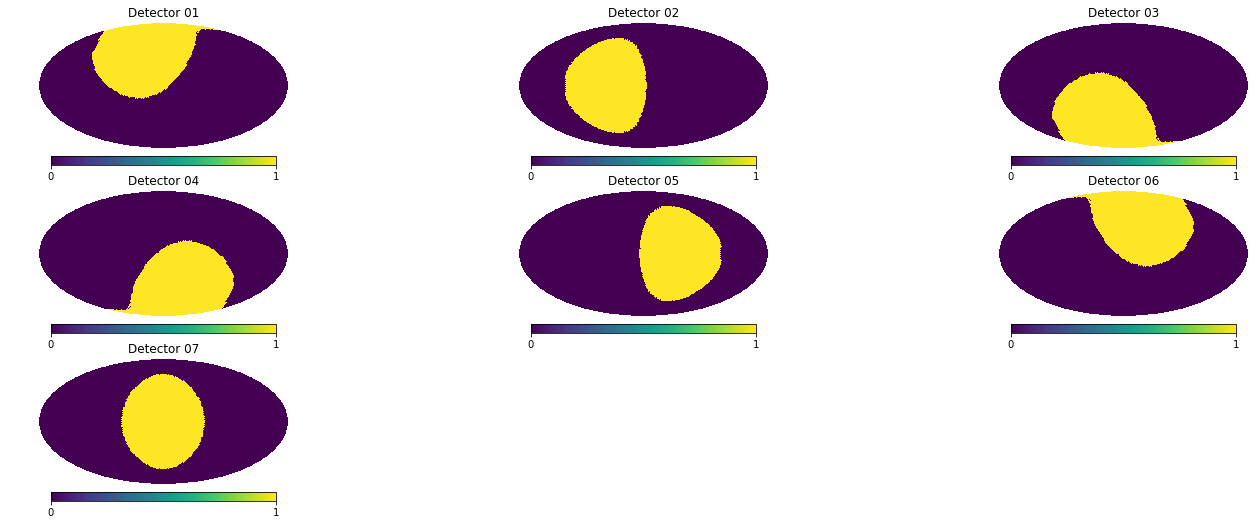

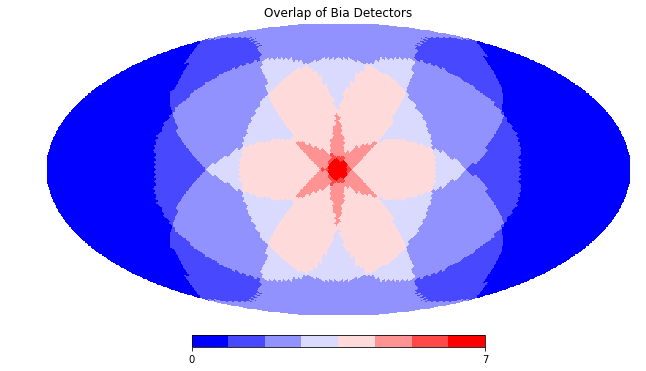

In [17]:
## evaluate detector overlap
bia_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-23.,fov=60.,index=0) for position in exposure_positions.T] 
                      for detector in bia.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(bia_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(bia_exposures[i],title='Detector '+bia_pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=bia_exposures.sum(axis=0)
#bia_fs=(exps-min(exps))/max(exps)
bia_fs_det=exps#-min(gbm_exps))/max(gbm_exps)

vmin_skewed = -1.0
vmid_skewed =  3.0
vmax_skewed = np.max(exps)
vstep = 1.0
levels = np.arange(vmin_skewed, vmax_skewed+vstep, vstep)
cmap = cm.get_cmap('bwr', len(levels)-1)
deltamax = max(vmax_skewed-vmid_skewed, vmid_skewed-vmin_skewed)

vfull = [ vmid_skewed-deltamax, vmid_skewed+deltamax]  # Full range either side of vmid
#levfull = np.arange( vfull[0], vfull[1], vstep ) # Levels over full value range
 
ncols = len(levels) -1 # number of colours we actually want to use
 
vlo_frac = (vmin_skewed-vfull[0]) / (2.0*deltamax) # 0 or greater
vhi_frac = (vmax_skewed-vfull[0]) / (2.0*deltamax) # 1 or less
cmap_base = cm.get_cmap('bwr') # maps the range 0-1 to colours
cols = cmap_base( np.linspace( vlo_frac, vhi_frac, ncols) )
cmap_skewed = mpl_col.LinearSegmentedColormap.from_list('skewed',cols, N=ncols)
cmap_skewed.set_bad('gray')
cmap_skewed.set_under('w')

hp.mollview(bia_fs_det,title='Overlap of Bia Detectors',cmap=cmap_skewed)#,cmap=cmap)#,max=2.5)
plot.savefig(biadir+'detector_overlap_'+str(ang)+'.png')

In [18]:
## fraction of visible sky with >=3 detectors coverage (aka localization)

w=np.where(bia_fs_det>=3)[0]
w0=np.where(bia_fs_det>0)[0]
print 'fraction of visible sky with >= 3 dets',len(w)*1./len(bia_fs_det)
c=[]
print '# dets, frac of sky with # det, cumulative'
for i in range(8):
    c.append(len(np.where(bia_fs_det==i)[0])*1./len(bia_fs_det))
    print i,c[i],np.cumsum(c)[i]
print np.sum(c[3:])

fraction of visible sky with >= 3 dets 0.285807291667
# dets, frac of sky with # det, cumulative
0 0.314127604167 0.3141276041666667
1 0.130777994792 0.44490559895833337
2 0.269287109375 0.7141927083333334
3 0.0961100260417 0.810302734375
4 0.167317708333 0.9776204427083334
5 0.0185546875 0.9961751302083334
6 0.00154622395833 0.9977213541666667
7 0.00227864583333 1.0
0.28580729166666663


In [19]:
print np.max(bia_exposures)

1.0
